In [16]:
# IMPORT NEEDED LIBRARIES 
import pandas as pd
import numpy as np
import warnings
import pmdarima as pm
import time
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from common.preprocessor import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv('Modified Data.csv', parse_dates=True, index_col=[0])

In [18]:
data.head()

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


In [52]:
data.describe()

,Price
count,252.00
mean,69.46
std,28.03
min,19.96
25%,48.47
50%,65.47
75%,91.95
max,134.79


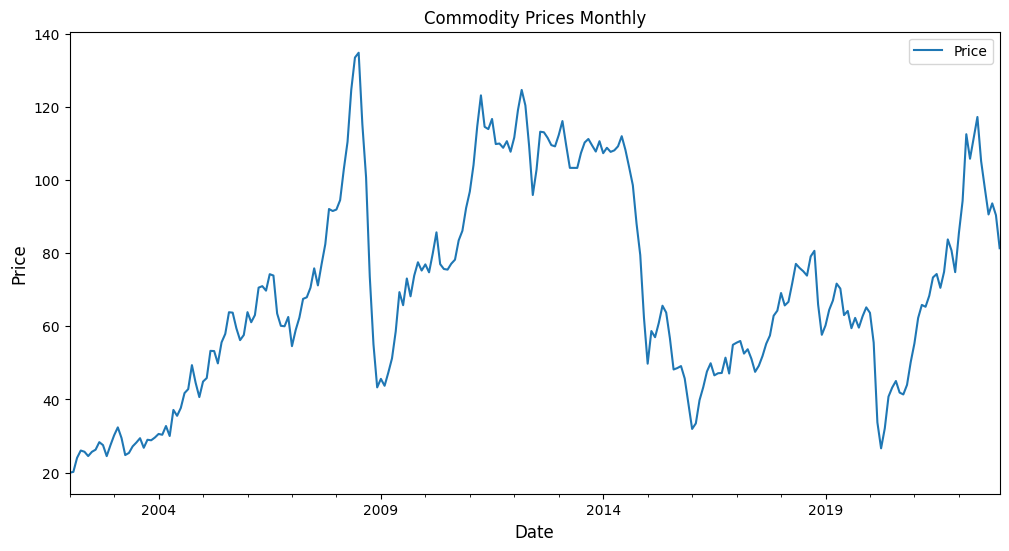

In [19]:
data.plot(y='Price', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [20]:
# Create training and testing datasets
train, test = train_test_split(data, test_size=0.2, shuffle=False)

In [21]:
train.shape, test.shape

((201, 1), (51, 1))

In [22]:
train.to_csv('train_data.csv')

In [23]:
test.to_csv('test_data.csv')

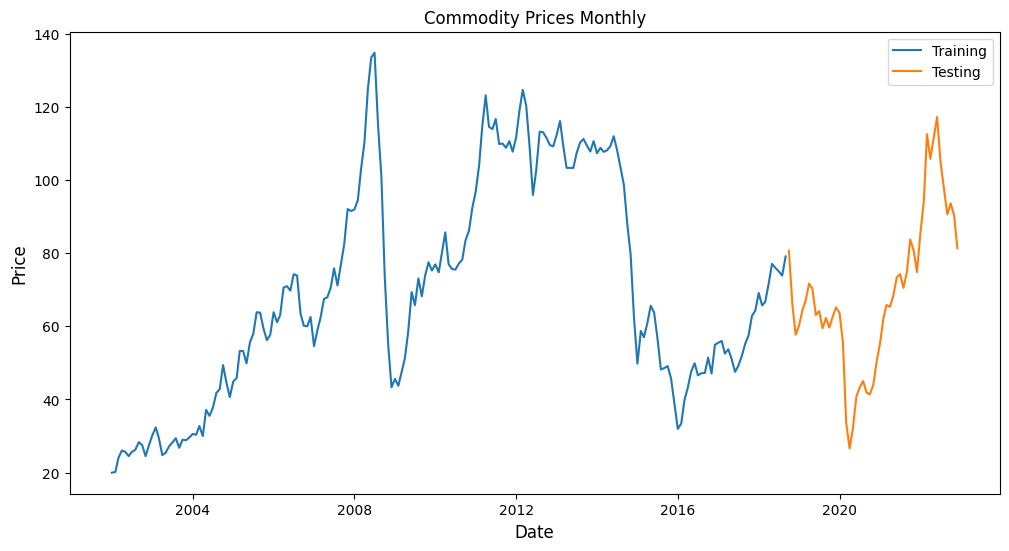

In [24]:
# Visualize the training and testing datasets
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.title('Commodity Prices Monthly')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.show()

In [25]:
# Prepare data for training
scaler = MinMaxScaler()
scaled_train = train.copy()
scaled_test = test.copy()
scaled_train['Price'] = scaler.fit_transform(scaled_train[['Price']])
print(scaled_train.shape, scaled_test.shape)

(201, 1) (51, 1)


In [26]:
# Check for stationarity with ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is likely stationary.")
    else:
        print("Data may be non-stationary. Consider differencing.")

print("Testing stationarity of scaled training data:")
adf_test(scaled_train['Price'])

print("\nTesting stationarity of scaled test data:")
adf_test(scaled_test['Price'])

Testing stationarity of scaled training data:
ADF Statistic: -2.4610076050408614
p-value: 0.1252520709317187
Data may be non-stationary. Consider differencing.

Testing stationarity of scaled test data:
ADF Statistic: -1.549083725438425
p-value: 0.509105854815543
Data may be non-stationary. Consider differencing.


In [27]:
# Identify number of differences required (if necessary)
n_diffs = pm.arima.ndiffs(scaled_train['Price'], test='adf')
print(f"\nNumber of differences required for scaled training data: {n_diffs}")

n_diffs = pm.arima.ndiffs(scaled_test['Price'], test='adf')
print(f"\nNumber of differences required for scaled test data: {n_diffs}")


Number of differences required for scaled training data: 1

Number of differences required for scaled test data: 2


In [28]:
# Perform differencing if required
if n_diffs > 0:
    differenced_train = scaled_train.diff(n_diffs).dropna()
    differenced_test = scaled_test.diff(n_diffs).dropna()
else:
    differenced_train = scaled_train.copy()
    differenced_test = scaled_test.copy()

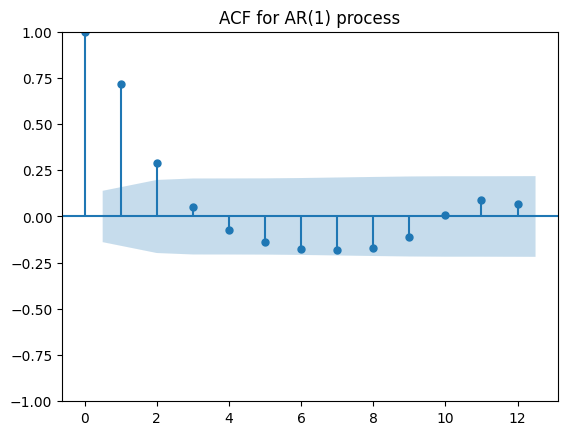

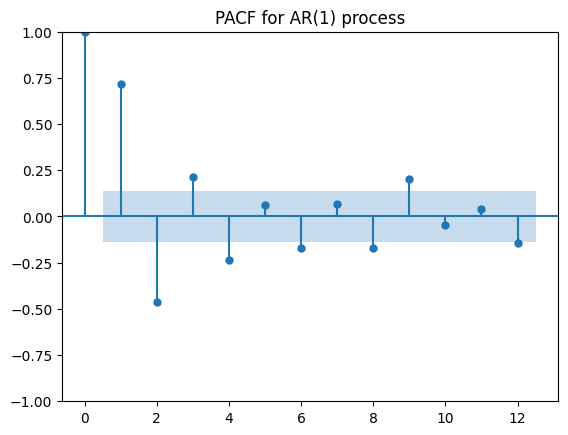

In [29]:
# ACF and PACF plots (optional)
plot_acf(differenced_train['Price'], lags=12, title='ACF for AR(1) process')
plt.show()
plot_pacf(differenced_train['Price'], lags=12, title='PACF for AR(1) process')
plt.show()

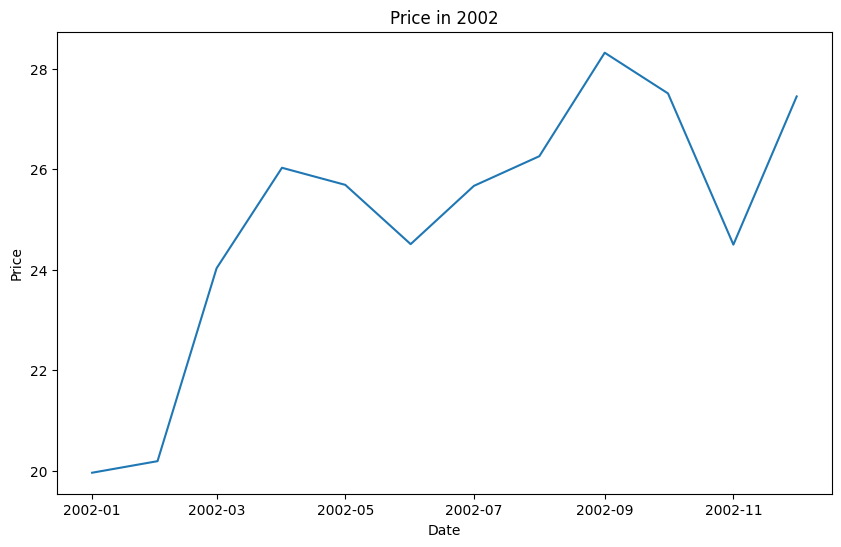

In [37]:
#PLOT FIRST, few  YEARs OF TRAINING DATA
df_2002 = data['2002']

plt.figure(figsize=(10, 6))
plt.plot(df_2002.index, df_2002['Price'])
plt.title('Price in 2002')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

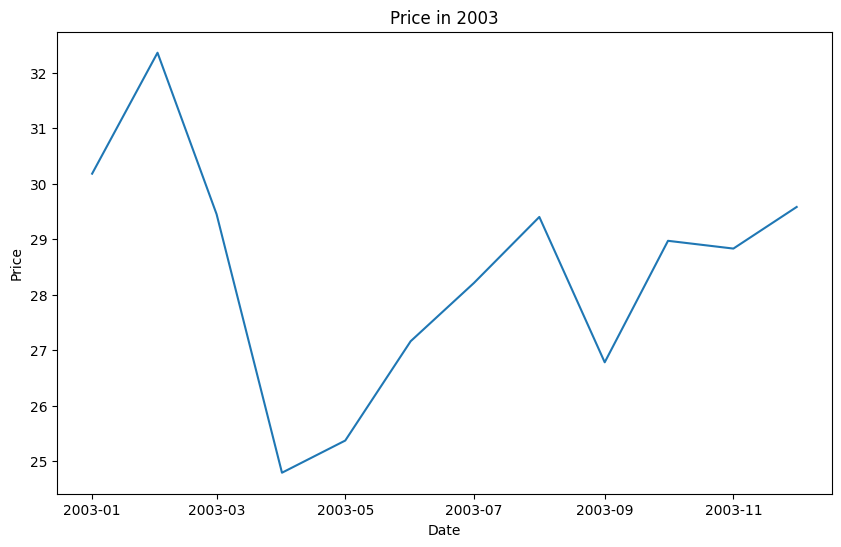

In [41]:
#PLOT FIRST, few  YEARs OF TRAINING DATA
df_2002 = data['2002']
df_2003 = data['2003']
df_2004 = data['2004']


plt.figure(figsize=(10, 6))
plt.plot(df_2003.index, df_2003['Price'])
# do subplots for 2003,2004


plt.title('Price in 2003')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

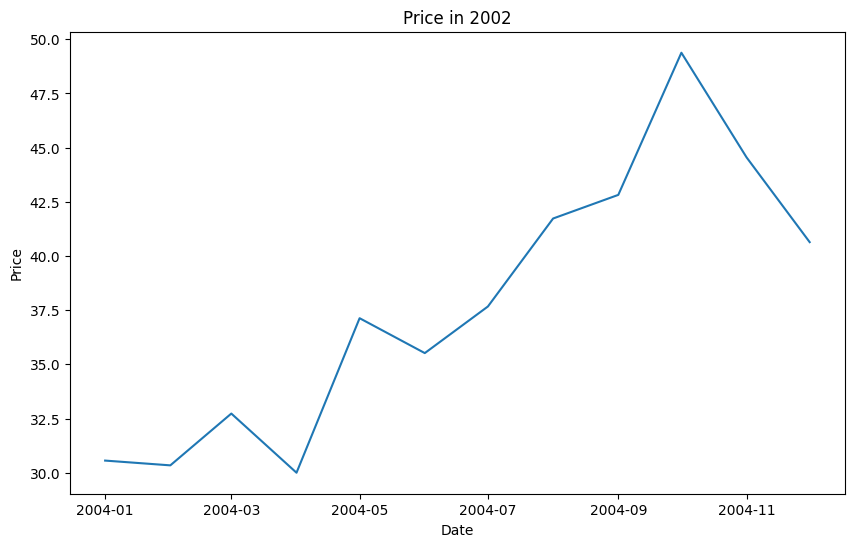

In [40]:
#PLOT FIRST, few  YEARs OF TRAINING DATA
df_2004 = data['2004']

plt.figure(figsize=(10, 6))
plt.plot(df_2004.index, df_2004['Price'])
plt.title('Price in 2002')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

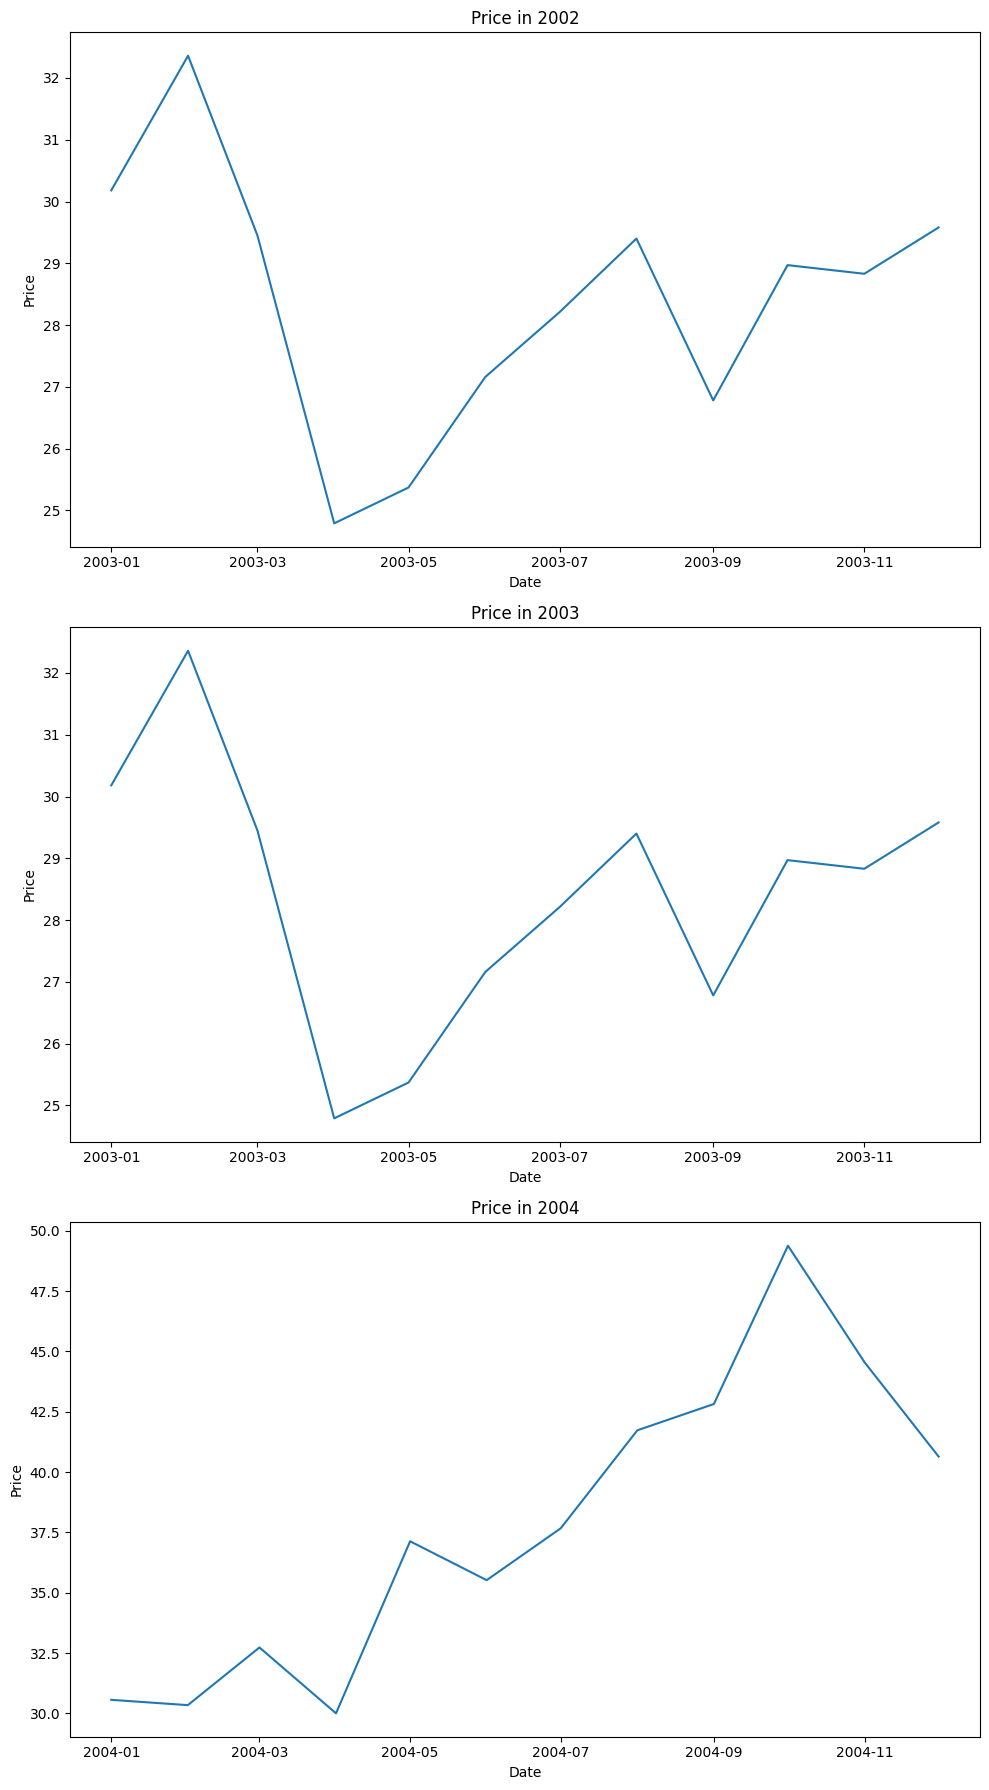

In [42]:
fig, axs = plt.subplots(3, figsize=(10, 18))

# Plot for 2002
axs[0].plot(df_2002.index, df_2002['Price'])
axs[0].set_title('Price in 2002')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')

# Plot for 2003
axs[1].plot(df_2003.index, df_2003['Price'])
axs[1].set_title('Price in 2003')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')

# Plot for 2004
axs[2].plot(df_2004.index, df_2004['Price'])
axs[2].set_title('Price in 2004')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [31]:
# Check for stationarity with ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is likely stationary.")
    else:
        print("Data may be non-stationary. Consider differencing.")

print("Testing stationarity of scaled training data:")
adf_test(differenced_train['Price'])

print("\nTesting stationarity of scaled test data:")
adf_test(differenced_train['Price'])

Testing stationarity of scaled training data:
ADF Statistic: -4.266802683572181
p-value: 0.0005068335095363369
Data is likely stationary.

Testing stationarity of scaled test data:
ADF Statistic: -4.266802683572181
p-value: 0.0005068335095363369
Data is likely stationary.


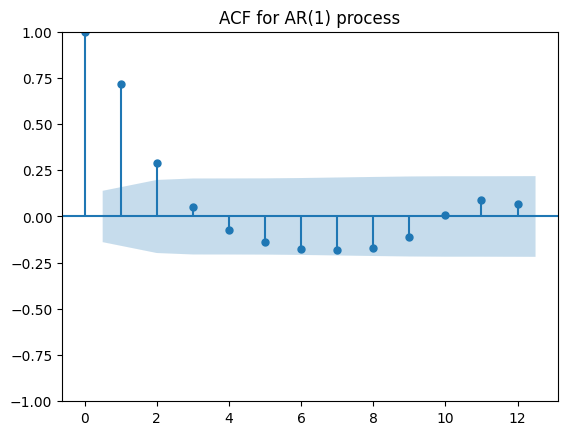

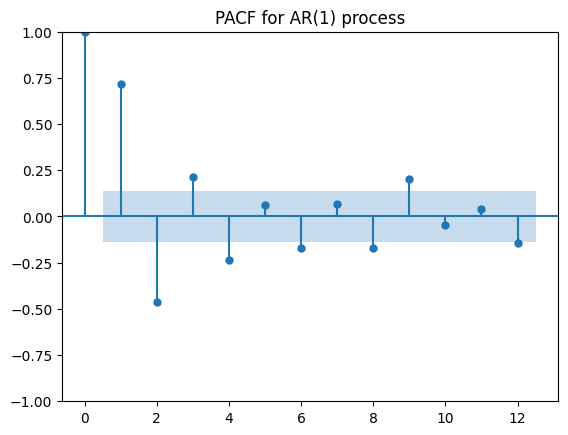

In [33]:
# ACF and PACF plots (optional)
plot_acf(differenced_train['Price'], lags=12, title='ACF for AR(1) process')
plt.show()
plot_pacf(differenced_train['Price'], lags=12, title='PACF for AR(1) process')
plt.show()

In [30]:
# Use auto_arima to find best parameters
model = auto_arima(differenced_train['Price'], start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                  start_P=0, seasonal=True, d=None, max_d=2, D=1, max_D=2, trace=True,
                  error_action='ignore', suppress_warnings=True,
                  stepwise=True)
print(f"\nAuto ARIMA identified parameters: {model.order}, {model.seasonal_order}")
# decide tradeoff between time and aic

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-269.383, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-436.956, Time=0.95 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-271.366, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-413.670, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-454.924, Time=2.14 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.85 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-322.832, Time=1.55 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-494.748, Time=2.97 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-471.705, Time=0.60 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.94 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=-493.1

In [34]:
# other information criteria
model = auto_arima(differenced_train['Price'], start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                  start_P=0, seasonal=True, d=None, max_d=2, D=1, max_D=2, trace=True,
                  error_action='ignore', suppress_warnings=True,
                  stepwise=True, information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : BIC=inf, Time=1.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : BIC=-262.920, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : BIC=-424.032, Time=0.98 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : BIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(0,1,0)[12]             : BIC=-268.135, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : BIC=-403.976, Time=0.22 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : BIC=-438.769, Time=2.06 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : BIC=inf, Time=3.74 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : BIC=inf, Time=1.47 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : BIC=-309.908, Time=1.68 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : BIC=-475.361, Time=2.99 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : BIC=-455.550, Time=0.78 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : BIC=inf, Time=4.17 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : BIC=inf, Time=1.91 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : BIC=-470.5

In [35]:
# Fit the SARIMA model on the differenced training data
model = SARIMAX(differenced_train, order=model.order, seasonal_order=model.seasonal_order, freq="MS")
model_fit = model.fit(disp=0)  # Suppress convergence output

In [44]:
# Make predictions on the differenced test set
predictions = model_fit.predict(start=differenced_test.index[0], end=differenced_test.index[-1])

In [45]:
# Invert differencing (if applied earlier)
if n_diffs > 0:
    # Invert seasonal differencing
    predictions_diff = pd.Series(predictions, index=differenced_test.index)
    predictions_seasonal = pd.Series(differenced_train.iloc[0]['Price'], index=differenced_train.index)
    predictions_seasonal = predictions_seasonal.add(predictions_diff, fill_value=0).fillna(0)

    # Invert first differencing
    predictions = pd.Series(scaled_test.iloc[0]['Price'], index=scaled_test.index)
    predictions = predictions.add(predictions_seasonal.cumsum(), fill_value=0).fillna(0)
else:
    # No differencing applied, so predictions on scaled test data is sufficient
    predictions = pd.Series(predictions, index=scaled_test.index)

In [46]:
# Invert scaling
predictions = scaler.inverse_transform(predictions.values.reshape(-1, 1))

In [47]:
# Evaluate model performance (using MSE here, consider adding other metrics)
# Ensure that 'predictions' is only as long as 'test'
if len(predictions) > len(test['Price']):
    predictions = predictions[:len(test['Price'])]

mse = mean_squared_error(test['Price'], predictions)
print(f'MSE: {mse}')

MSE: 5714.45102156862


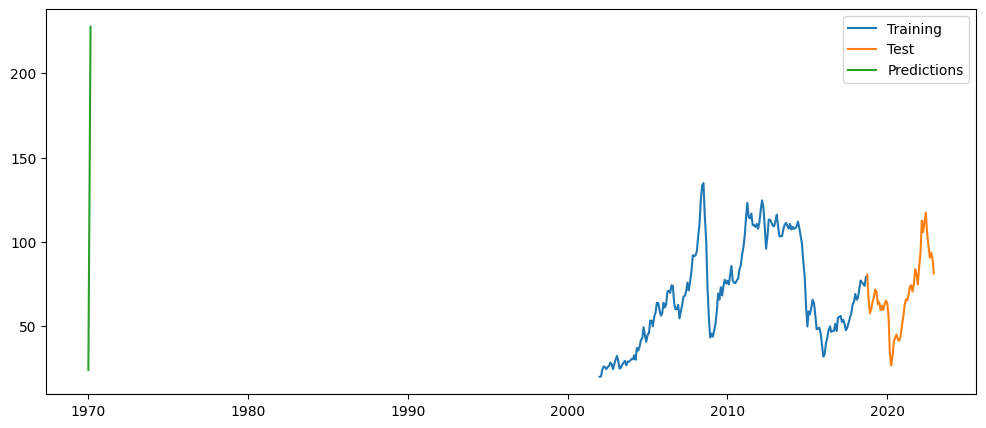

In [48]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

# Additional steps (optional):
# - Save the model for future use
# - Implement error handling for potential issues

In [50]:
%%time
# show a table of the predicted values based on the test data
df = pd.DataFrame({'Actual': test['Price'], 'Predicted': predictions.flatten()})
df.head(20)

CPU times: total: 0 ns
Wall time: 0 ns


,Actual,Predicted
2018-10-01,80.63,24.03
2018-11-01,65.96,28.10
2018-12-01,57.67,32.17
2019-01-01,60.23,36.24
2019-02-01,64.50,40.31
2019-03-01,67.05,44.38
2019-04-01,71.66,48.45
2019-05-01,70.30,52.52
2019-06-01,63.05,56.59
2019-07-01,64.19,60.66


In [120]:

# end_time = time.time()
# total_time = end_time - start_time
# # convert time into minutes and seconds

# print(f'Total time taken: {total_time%60} minutes ')
# print('Thanks for being with us')